In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

    # CRIM - per capita crime rate by town
    # ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    # INDUS - proportion of non-retail business acres per town.
    # CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    # NOX - nitric oxides concentration (parts per 10 million)
    # RM - average number of rooms per dwelling
    # AGE - proportion of owner-occupied units built prior to 1940
    # DIS - weighted distances to five Boston employment centres
    # RAD - index of accessibility to radial highways
    # TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

In [3]:
# read the data

df=pd.read_csv('HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
#find the number of empty value in dataset
print(df.isna().sum())

#convert the empty value into 0
df=df.fillna(0)

#check null or empty values are get converted into 0 or not
print('\n',df.isna().sum())


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


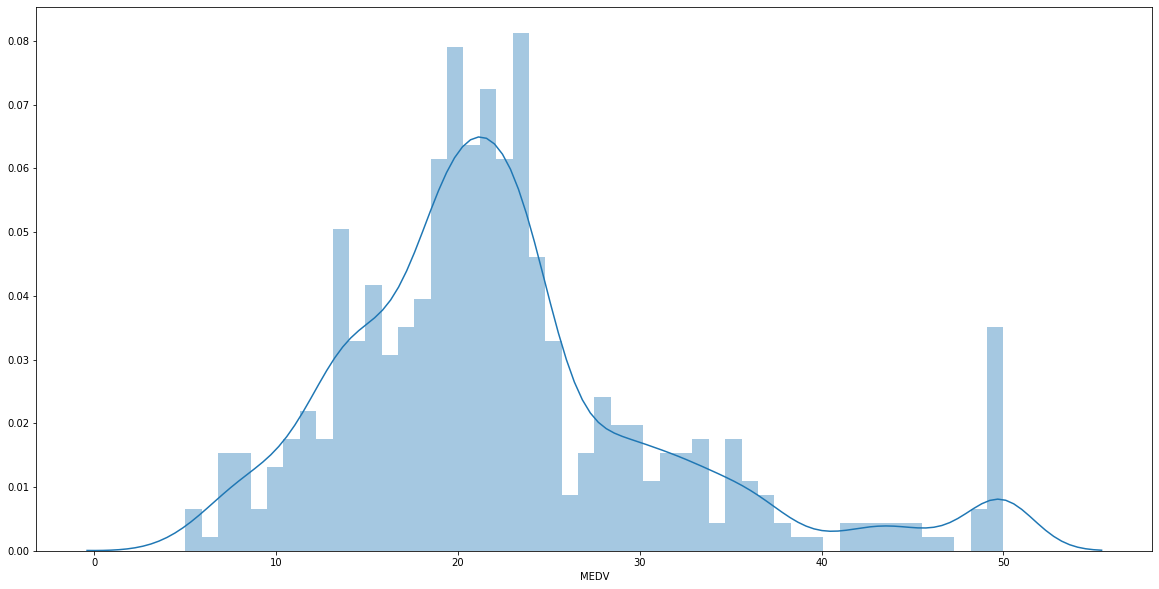

In [34]:
# check tha distribution plot of our target feature

plt.figure(figsize=(20,10))
sns.distplot(df['MEDV'],bins=50)
plt.show()

In [35]:
# check the correlation

df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.185559,0.379772,-0.055713,0.410918,-0.220340,0.328997,-0.365901,0.600505,0.559880,0.278243,-0.364886,0.411330,-0.384120
ZN,-0.185559,1.000000,-0.482670,-0.032992,-0.498619,0.312295,-0.470146,0.632428,-0.300061,-0.304385,-0.394622,0.170125,-0.361012,0.362292
INDUS,0.379772,-0.482670,1.000000,0.055833,0.690250,-0.339054,0.488737,-0.662476,0.564867,0.687468,0.372852,-0.341514,0.492359,-0.441371
CHAS,-0.055713,-0.032992,0.055833,1.000000,0.070867,0.106797,0.054485,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.040427,0.183844
NOX,0.410918,-0.498619,0.690250,0.070867,1.000000,-0.302188,0.627476,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.549209,-0.427321
RM,-0.220340,0.312295,-0.339054,0.106797,-0.302188,1.000000,-0.227535,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.584754,0.695360
AGE,0.328997,-0.470146,0.488737,0.054485,0.627476,-0.227535,1.000000,-0.641898,0.420382,0.459859,0.239508,-0.214615,0.503452,-0.356699
DIS,-0.365901,0.632428,-0.662476,-0.092318,-0.769230,0.205246,-0.641898,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.456922,0.249929
RAD,0.600505,-0.300061,0.564867,-0.003339,0.611441,-0.209847,0.420382,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.438134,-0.381626
TAX,0.559880,-0.304385,0.687468,-0.035822,0.668023,-0.292048,0.459859,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.494026,-0.468536


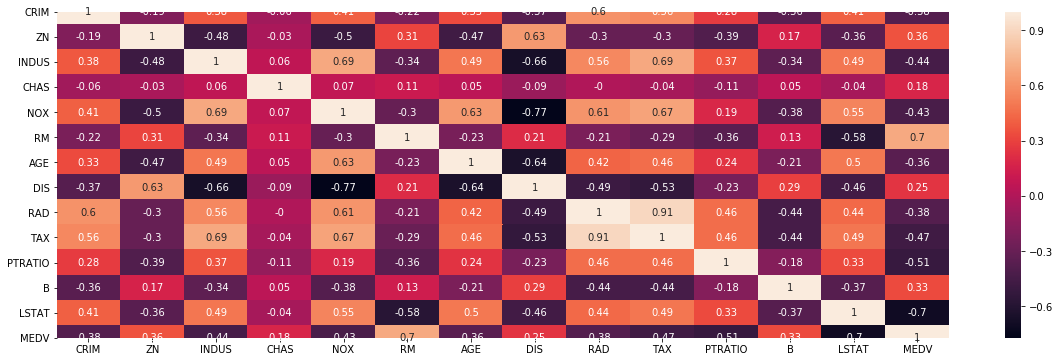

In [36]:
# visualise the correlation of feature with target variable

plt.figure(figsize=(20,6))
cor_matrix=df.corr().round(2)
sns.heatmap(data=cor_matrix,annot=True)
plt.show()

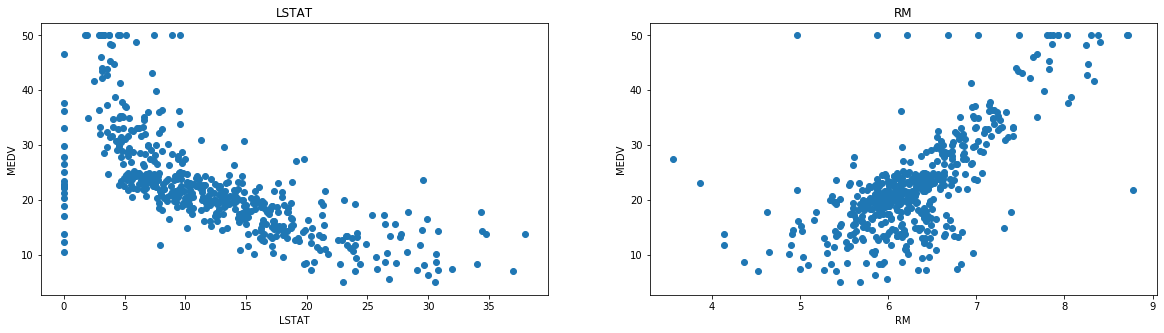

In [9]:
# plt.figure(figsize=(20, 5))

# features = ['LSTAT', 'RM']

# target = df['MEDV']

# for i, col in enumerate(features):

#     plt.subplot(1, len(features) , i+1)

#     x = df[col]

#     y = target

#     plt.scatter(x, y)

#     plt.title(col)

#     plt.xlabel(col)

#     plt.ylabel('MEDV')

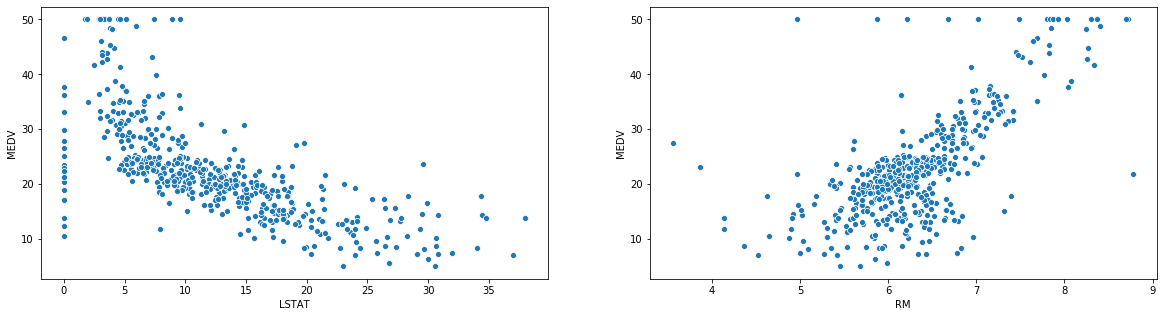

In [37]:
# check the linearity between LSTAT and RM with our target feature MEDV

fig,axes=plt.subplots(1,2,figsize=(20,5))
sns.scatterplot(data=df.corr(),x=df['LSTAT'],y=df['MEDV'],ax=axes[0],marker='o')
sns.scatterplot(data=df.corr(),x=df['RM'],y=df['MEDV'],ax=axes[1])
plt.show()



In [40]:
# We observe that from the heatmap of correlation matrix from the 
# dependent features LSTAT and RM are highly correlated with target variable MEDV
# Hence we gone select only this two feature as a dependent feature to calculate the model prediction

x_trn=df[['LSTAT','RM']]
y=df['MEDV']
x_train,x_test,y_train,y_test=train_test_split(x_trn,y,random_state=1,test_size=0.1)
lr=LinearRegression()
lr.fit(x_train,y_train)

print('intercept value i.e. theta0 = ', lr.intercept_)
print('\ncoefficient value i.e. theta1 =',lr.coef_)

intercept value i.e. theta0 =  -5.514264589388766

coefficient value i.e. theta1 = [-0.54983877  5.54432399]


In [41]:
#model evolution for testing set
y_pred_test = lr.predict(x_test)
print('\n mean squared erro valuse = ',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print('\n r2 score =',r2_score(y_test,y_pred_test))


 mean squared erro valuse =  5.632608411948522

 r2 score = 0.6581543284188802


In [42]:
# model evolution for training set

y_pred_training =lr.predict(x_train)
print('\n mean squared erro valuse = ',np.sqrt(mean_squared_error(y_train,y_pred_training)))
print('\n r2 score =',r2_score(y_train,y_pred_training))


 mean squared erro valuse =  5.749423876676486

 r2 score = 0.6040031956464276


In [43]:
# we can observe that result of using multiple linear regression is not giving the best fit model 
# Lets check the model accuraccy by using Polynomial regression 

In [44]:
# Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

# create Polynomial Feature with degree 2
pf=PolynomialFeatures()

# Tansform the x feature value
x_poly=pf.fit_transform(x_trn)

# Split data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,random_state=1,test_size=0.3)

# Create Linear regression object
lr=LinearRegression()

# fit training data
lr.fit(x_train,y_train)

# Prediction on testing data 
y_pred=lr.predict(x_test)

# check model accuracy and error value
print('r2 score is',r2_score(y_test,y_pred))
print('mean squared error',mean_squared_error(y_test,y_pred))

r2 score is 0.8002341258437613
mean squared error 18.30943873623289


# Hence we got more accurate model accuraccy value then Multilinear regression 